In [1]:
from utils.image_utils import display_image

In [2]:
# avoid the tensor parallelism warning
!set TOKENIZERS_PARALLELISM=False

## What are tokenizers?

Tokenizers are one of the core components of the NLP pipeline. They serve one purpose: to translate text into data that can be processed by the model. Models can only process numbers, so tokenizers need to convert our text inputs to numerical data.


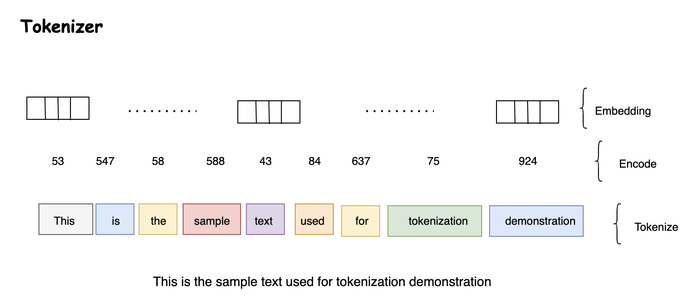

In [3]:
display_image('assets/tokenizer_working.png', width=700, height=300)

In [4]:
sentence='This is a sample text used for tokenization demonstration'

In [5]:
tokenized_text = sentence.split()
print(tokenized_text)

['This', 'is', 'a', 'sample', 'text', 'used', 'for', 'tokenization', 'demonstration']


### Types of tokenizers

- character based tokenizer
- subword tokenizer
    - Byte-level BPE, as used in GPT-2
    - WordPiece, as used in BERT
    - SentencePiece or Unigram, as used in several multilingual models

## Loading the tokenizers

In [6]:
from transformers import LlamaTokenizer, BertTokenizer, AutoTokenizer

In [7]:
# llama_tokenizer = LlamaTokenizer('respective llama model')

In [8]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
# the AutoTokenizer class will grab the proper tokenizer class in the library based on the checkpoint name, and can be used directly with any checkpoint:
# tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [9]:
tokenizer(sentence)

{'input_ids': [101, 1188, 1110, 170, 6876, 3087, 1215, 1111, 22559, 2734, 11104, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
tokens = tokenizer.tokenize(sentence)
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens=tokens)
print(ids)
tokens = tokenizer.decode(token_ids=ids)
print(tokens)

['This', 'is', 'a', 'sample', 'text', 'used', 'for', 'token', '##ization', 'demonstration']
[1188, 1110, 170, 6876, 3087, 1215, 1111, 22559, 2734, 11104]
This is a sample text used for tokenization demonstration


## Loading Models

In [11]:
from transformers import BertConfig, BertModel, AutoModel

# Building the config
config = BertConfig()

# Building the model from the config
model = BertModel(config)

In [12]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [13]:
config

BertConfig {
  "_attn_implementation_autoset": true,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.49.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [14]:
model = BertModel.from_pretrained("bert-base-cased")

In [15]:
model = AutoModel.from_pretrained("bert-base-cased")

### similar to the AutoTokenizer the AUtoModel class will grab the proper model class in the library based on the checkpoint name, and can be used directly with any checkpoint:

## Handling Multiple Sequences

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a NLP course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor([ids])
# This line will fail.
output = model(input_ids)

print(output.logits)

In [1]:
# sequences of varied length.
batched_ids = [
    [200, 200, 200],
    [200, 200]
]

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)

## Attention masks
Attention masks are tensors with the exact same shape as the input IDs tensor, filled with 0s and 1s: 1s indicate the corresponding tokens should be attended to, and 0s indicate the corresponding tokens should not be attended to

In [2]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


Note: With Transformer models, there is a limit to the lengths of the sequences we can pass the models. Most models handle sequences of up to 512 or 1024 tokens, and will crash when asked to process longer sequences. There are two solutions to this problem:

- Use a model with a longer supported sequence length.
- Truncate your sequences.